# Análisis de los twits de \#PiñeraRenuncia

In [3]:
import nltk
import PyPDF2 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import pandas as pd
import re
import numpy as np
from PIL import Image


%matplotlib inline

In [126]:
rdata = pd.read_csv('tweets_sobre_pinera.csv')

In [127]:
rdata.shape

(10664, 8)

In [128]:
rdata.sample(3)

,Unnamed: 0,id_str,created_at,user.screen_name,user.location,retweeted_status.created_at,text,extended_tweet.full_text
4195,1059,1186714357314605056,Tue Oct 22 18:42:05 +0000 2019,Marianap3428,NaN,Tue Oct 22 18:33:55 +0000 2019,RT @AleDiezRT: Presidente @sebastianpinera \n\...,NaN
4663,1124,1186716950942105602,Tue Oct 22 18:52:23 +0000 2019,Jrobertofm,"Talca, Chile",Tue Oct 22 18:43:08 +0000 2019,RT @MarceCubillosH: cuál montaje? #PineraDicta...,NaN
6610,3616,1186725072372994049,Tue Oct 22 19:24:40 +0000 2019,cojoscky,"Santiago, Chile",Tue Oct 22 11:52:29 +0000 2019,RT @macarenasaav: Súper buen video para q los ...,NaN


In [129]:
rdata['text']

0        Apoyando la guerra Falsa de piñera, y tratando...
1        RT @gapecito: Dejen de justificar a la vieja b...
2        RT @tayswiftclub: piñera: *saca a los militare...
3        RT @Fran_RedBird: #QueSeVayanLosMilicos\n#Chil...
4        RT @TottiAlba: Alcalde de Curicó exige e estos...
                               ...                        
10659    Aquí con los violentistas #PineraDictador #pin...
10660    RT @guatonbayron: LA PRENSA CHILENA ES CÓMPLIC...
10661    RT @MiguelMasbernat: TRAIGO PAAAAZ...TRAIGO AM...
10662    RT @TottiAlba: Alcalde de Curicó exige e estos...
10663    RT @ZurditaFilosofa: Quieren sacar a #piñeradi...
Name: text, Length: 10664, dtype: object

### Preprocesamiento

In [130]:
rdata["texto"] = rdata["text"].str.lower()
rdata["texto"]

0        apoyando la guerra falsa de piñera, y tratando...
1        rt @gapecito: dejen de justificar a la vieja b...
2        rt @tayswiftclub: piñera: *saca a los militare...
3        rt @fran_redbird: #quesevayanlosmilicos\n#chil...
4        rt @tottialba: alcalde de curicó exige e estos...
                               ...                        
10659    aquí con los violentistas #pineradictador #pin...
10660    rt @guatonbayron: la prensa chilena es cómplic...
10661    rt @miguelmasbernat: traigo paaaaz...traigo am...
10662    rt @tottialba: alcalde de curicó exige e estos...
10663    rt @zurditafilosofa: quieren sacar a #piñeradi...
Name: texto, Length: 10664, dtype: object

In [131]:
rdata["texto"] = rdata["texto"].str.replace('[á]','a')
rdata["texto"] = rdata["texto"].str.replace('[é]','e')
rdata["texto"] = rdata["texto"].str.replace('[í]','i')
rdata["texto"] = rdata["texto"].str.replace('[ó]','o')
rdata["texto"] = rdata["texto"].str.replace('[ú]','u')
rdata["texto"]

0        apoyando la guerra falsa de piñera, y tratando...
1        rt @gapecito: dejen de justificar a la vieja b...
2        rt @tayswiftclub: piñera: *saca a los militare...
3        rt @fran_redbird: #quesevayanlosmilicos\n#chil...
4        rt @tottialba: alcalde de curico exige e estos...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660    rt @guatonbayron: la prensa chilena es complic...
10661    rt @miguelmasbernat: traigo paaaaz...traigo am...
10662    rt @tottialba: alcalde de curico exige e estos...
10663    rt @zurditafilosofa: quieren sacar a #piñeradi...
Name: texto, Length: 10664, dtype: object

In [132]:
rdata["texto"] = rdata["texto"].str.replace('[^a-zA-Záéíóúñ@#]',' ')
rdata["texto"]

0        apoyando la guerra falsa de piñera  y tratando...
1        rt @gapecito  dejen de justificar a la vieja b...
2        rt @tayswiftclub  piñera   saca a los militare...
3        rt @fran redbird  #quesevayanlosmilicos #chile...
4        rt @tottialba  alcalde de curico exige e estos...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660    rt @guatonbayron  la prensa chilena es complic...
10661    rt @miguelmasbernat  traigo paaaaz   traigo am...
10662    rt @tottialba  alcalde de curico exige e estos...
10663    rt @zurditafilosofa  quieren sacar a #piñeradi...
Name: texto, Length: 10664, dtype: object

In [133]:
rdata["texto"] = rdata["texto"].str.replace(r'rt(\s)','')

In [134]:
rdata["texto"]

0        apoyando la guerra falsa de piñera  y tratando...
1        @gapecito  dejen de justificar a la vieja borr...
2        @tayswiftclub  piñera   saca a los militares a...
3        @fran redbird  #quesevayanlosmilicos #chilecam...
4        @tottialba  alcalde de curico exige e estos mo...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660    @guatonbayron  la prensa chilena es complice d...
10661    @miguelmasbernat  traigo paaaaz   traigo amooo...
10662    @tottialba  alcalde de curico exige e estos mo...
10663    @zurditafilosofa  quieren sacar a #piñeradicta...
Name: texto, Length: 10664, dtype: object

In [135]:
rdata["texto"] = rdata["texto"].str.replace(r'@\w+','')

In [136]:
rdata["texto"]

0        apoyando la guerra falsa de piñera  y tratando...
1          dejen de justificar a la vieja borracha #cec...
2          piñera   saca a los militares a las calles p...
3         redbird  #quesevayanlosmilicos #chilecambio #...
4          alcalde de curico exige e estos momentos en ...
                               ...                        
10659    aqui con los violentistas #pineradictador #pin...
10660      la prensa chilena es complice de un gobierno...
10661      traigo paaaaz   traigo amoooor #piñerarenunc...
10662      alcalde de curico exige e estos momentos en ...
10663      quieren sacar a #piñeradictador del poder   ...
Name: texto, Length: 10664, dtype: object

Borré estas stopwords porque en esta selección de twits había una referencia particular al jose miguel y el alcalde de curicó

In [137]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.extend([
    'http',
    'co',
    'curico',
    'https',
    'alcalde',
    'jose',
    'jose miguel',
    'miguel',
    'performance'
])

In [138]:
def stopwordsRemover(text):
    #sentence = list(nltk.word_tokenize(text))
    sentence = text.split(" ")
    sentence = [word for word in sentence if (word not in stopwords) and (len(word)>1)]
    return sentence

In [139]:
rdata["clean"] = rdata["texto"].apply(stopwordsRemover)

In [140]:
rdata["clean"]

0        [apoyando, guerra, falsa, piñera, tratando, qu...
1        [dejen, justificar, vieja, borracha, #ceciliam...
2        [piñera, saca, militares, calles, asustar, chi...
3        [redbird, #quesevayanlosmilicos, #chilecambio,...
4        [exige, momentos, renuncia, ministro, interior...
                               ...                        
10659    [aqui, violentistas, #pineradictador, #pinerar...
10660    [prensa, chilena, complice, gobierno, asesino,...
10661    [traigo, paaaaz, traigo, amoooor, #piñerarenun...
10662    [exige, momentos, renuncia, ministro, interior...
10663    [quieren, sacar, #piñeradictador, poder, enton...
Name: clean, Length: 10664, dtype: object

In [141]:
wordCloudCorpus = " ".join([" ".join(lista) for lista in rdata["clean"]])
wordCloudCorpus

'apoyando guerra falsa piñera tratando quitar merito real demandas gente gobierno dpndmzbbnt dejen justificar vieja borracha #ceciliamorelbebeconet #renunciapiñera #toquedequedaenchile piñera saca militares calles asustar chilenos chilenos #piñeradictador #estopasaenchile redbird #quesevayanlosmilicos #chilecambio #chiledespeto nueva constitucio exige momentos renuncia ministro interior asesinato coronel concepcion casas llevan #piñeradictador fvayvnobox #estopasaenchile deciamos aparecia catastrofes tenia sed sangre equ exige momentos renuncia ministro interior asesinato #estopasaenchile maestros rien realizan dichos guerra solo dato #estopasaenchile maestros rien realizan dichos guerra solo dato #piñeradictador guardias asesinaron joven renuncia inoperante #renunciapiñera #derechoshumanos preferir gastar plata armamento dialogar mierda pasa weon #piñeradictador #piñerarenuncia escuchen voz chileno incompetentes #quesevayanlosmilicos #renunciapineira #chile guerra gusta gdgxzeh #quese

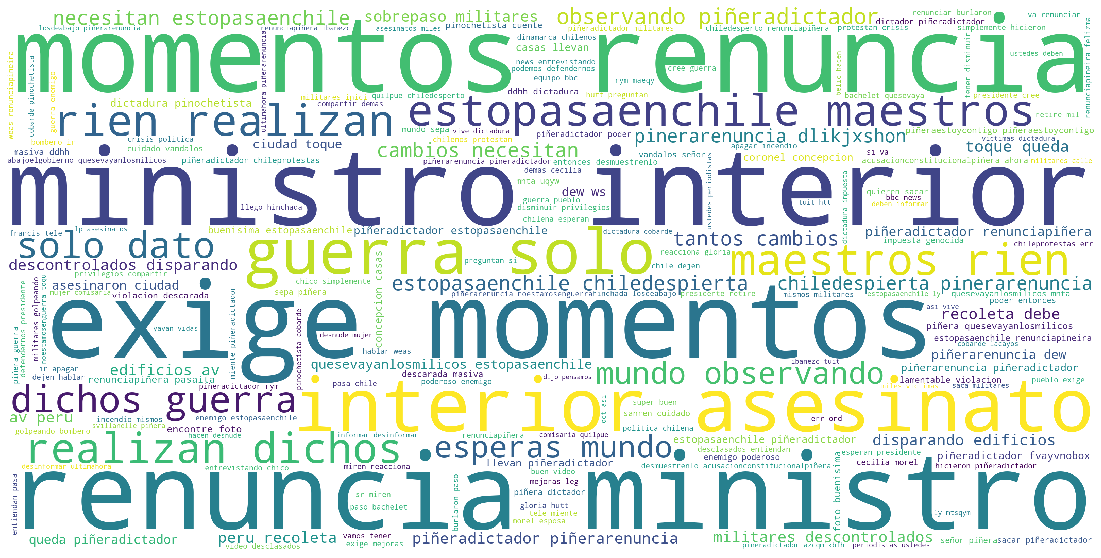

In [142]:
wordcloud = WordCloud(width=3200, height=1600,background_color="white").generate(wordCloudCorpus)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.savefig('renunciaPinera.png') 
plt.axis("off")
plt.show()

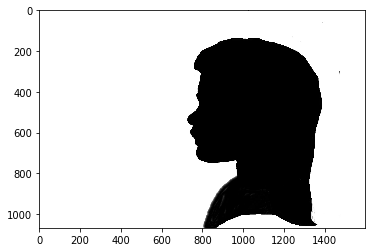

In [4]:
maskHead = np.array(Image.open("head.jpg"))
plt.imshow(maskHead)

In [149]:
wordCloudCorpus

'apoyando guerra falsa piñera tratando quitar merito real demandas gente gobierno dpndmzbbnt dejen justificar vieja borracha #ceciliamorelbebeconet #renunciapiñera #toquedequedaenchile piñera saca militares calles asustar chilenos chilenos #piñeradictador #estopasaenchile redbird #quesevayanlosmilicos #chilecambio #chiledespeto nueva constitucio exige momentos renuncia ministro interior asesinato coronel concepcion casas llevan #piñeradictador fvayvnobox #estopasaenchile deciamos aparecia catastrofes tenia sed sangre equ exige momentos renuncia ministro interior asesinato #estopasaenchile maestros rien realizan dichos guerra solo dato #estopasaenchile maestros rien realizan dichos guerra solo dato #piñeradictador guardias asesinaron joven renuncia inoperante #renunciapiñera #derechoshumanos preferir gastar plata armamento dialogar mierda pasa weon #piñeradictador #piñerarenuncia escuchen voz chileno incompetentes #quesevayanlosmilicos #renunciapineira #chile guerra gusta gdgxzeh #quese

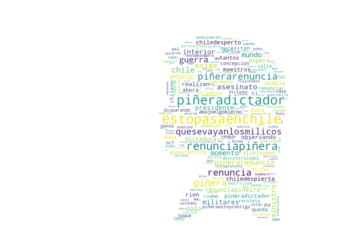

In [150]:
from wordcloud import WordCloud

wordcloud = WordCloud(collocations=False,background_color="white",mask=maskHead)

wordcloud.generate(wordCloudCorpus)

wordcloud.to_file("wordcloudHeadPython.png")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()